In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt
import japanize_matplotlib
import math


In [2]:
# CSVファイルを読み込む
file_path = "./logs/ranzatsu/"

df_gyro = pd.read_csv(
    f"{file_path}Gyroscope.csv",
    header=0,
    names=("time", "x", "y", "z", "norm")
)


In [3]:
# 角速度から角度を計算する
t = df_gyro['time'].max() - df_gyro['time'].min()
n = len(df_gyro)
a = np.degrees(t/n)

df_gyro['i_x'] = np.cumsum(df_gyro['x']) * a
df_gyro['i_y'] = np.cumsum(df_gyro['y']) * a
df_gyro['i_z'] = np.cumsum(df_gyro['z']) * a

In [4]:
# グラフを描画する
def plot(
    df,
    heads=[],
    title=None,
    xlabel=None,
    ylabel=None,
    figsize=(10, 3),
    xlim=(0, 0),
    ylim=(0, 0),
    grid=True,
):
    fig = plt.figure(figsize=figsize)

    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if grid:
        plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5)

    if xlim[0] < xlim[1]:
        plt.xlim(xlim[0], xlim[1])
    if ylim[0] < ylim[1]:
        plt.ylim(ylim[0], ylim[1])

    for head in heads:
        plt.plot(df[head[0]], df[head[1]], label=head[1])

    plt.legend()

    plt.show()


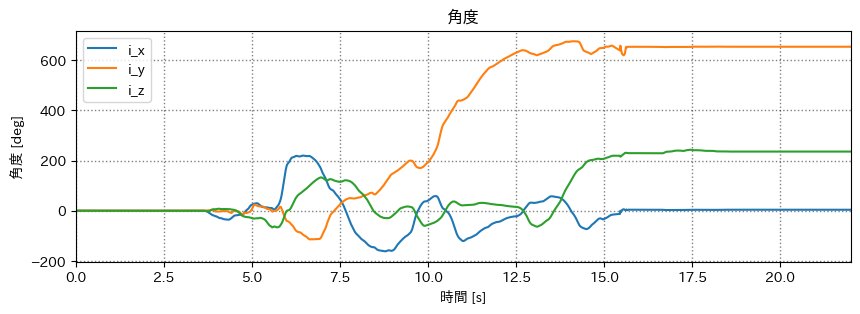

In [5]:
plot(
    df_gyro,
    heads=[
        ('time', 'i_x'),
        ('time', 'i_y'),
        ('time', 'i_z'),
    ],
    title="角度",
    xlabel="時間 [s]",
    ylabel="角度 [deg]",
    xlim=(0, 22),
    ylim=(0, 0),
    grid=True,
)